In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

# Preprocessing 

In [2]:
# Read in raw data
df = pd.read_csv('data/wiki4HE.csv', delimiter=';', na_values='?')
# Capitalize all columns
df.columns = [col.upper() for col in df.columns]

df.head()

,AGE,GENDER,DOMAIN,PHD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,INC1,INC2,INC3,INC4,EXP1,EXP2,EXP3,EXP4,EXP5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0


## Split dataset into train and test files

In [3]:
# Hold off testing set
test_size = int(0.2*len(df))

# Set random seed and select random indices
rng = np.random.RandomState(42) 
rand_rows = rng.choice(list(df.index), size=test_size, replace=False)

# Split data into training set and testing subsets
df_test = df.loc[rand_rows]
df_train = df.drop(labels=rand_rows)

In [4]:
df_train.shape

(731, 53)

In [5]:
df_test.shape

(182, 53)

In [6]:
assert len(df_train)+len(df_test) == len(df), "Check dimensions of the training and test sets"

### Save to CSV

In [7]:
df_train.to_csv('data/wiki4HE_train.csv')
df_test.to_csv('data/wiki4HE_test.csv')

In [8]:
pd.read_csv('data/wiki4HE_train.csv')

,Unnamed: 0,AGE,GENDER,DOMAIN,PHD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,...,BI2,INC1,INC2,INC3,INC4,EXP1,EXP2,EXP3,EXP4,EXP5
0,0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,904,34,1,1.0,1,6.0,2,NaN,NaN,7.0,...,2.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,1.0,2.0
727,905,48,0,6.0,1,21.0,2,NaN,NaN,2.0,...,1.0,3.0,4.0,3.0,5.0,4.0,5.0,4.0,1.0,1.0
728,909,53,0,6.0,0,25.0,2,NaN,NaN,6.0,...,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
729,910,39,0,5.0,1,9.0,2,NaN,NaN,4.0,...,2.0,5.0,4.0,3.0,NaN,5.0,5.0,5.0,4.0,1.0


# Exploratory Data Analysis

In [9]:
# Survey questions used
df_constructs = pd.read_csv('data/construct_measures.csv', index_col='variable')
df_constructs.sample(10)

,construct,statement
variable,,
QU1,Quality,Articles in Wikipedia are reliable
PEU2,Perceived Ease of Use,It is easy to find in Wikipedia the informatio...
VIS1,Visibility,Wikipedia improves visibility of students' work
ENJ1,Perceived Enjoyment,The use of Wikipedia stimulates curiosity
ENJ2,Perceived Enjoyment,The use of Wikipedia is entertaining
BI1,Behavioral intention,In the future I will recommend the use of Wiki...
PEU3,Perceived Ease of Use,It is easy to add or edit information in Wikip...
PHD,Demographic,Has PhD or Not
INC4,Incentives,To design educational activities using Wikiped...


In [10]:
# Plotting function for Use behavior bar charts
def plot_bar(target):
    target_content = df_constructs.loc[target]

    print("Null values: ", df_train[target].isnull().sum())
    print()
    binary_df = df_train[target].map({5:'Yes', 4: 'Yes', 2: 'No', 1: 'No'}).dropna()
    print("Total number of non-neutral: ", len(binary_df))
    print(binary_df.value_counts(normalize=True))
    df_train[target].value_counts(normalize=True).sort_index().plot(kind='barh')
    plt.xlabel('Relative Frequency')
    plt.title(f'{target_content.construct} distribution\n"{target_content.statement}"')

### Use behavior 1

Null values:  9

Total number of non-neutral:  572
No     0.839161
Yes    0.160839
Name: USE1, dtype: float64


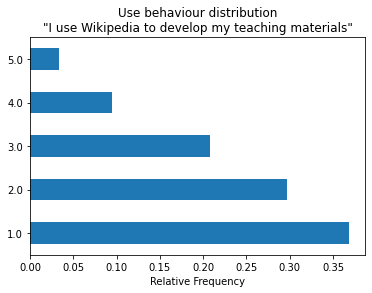

In [11]:
plot_bar('USE1')

### Use behavior 2

Null values:  12

Total number of non-neutral:  607
No     0.884679
Yes    0.115321
Name: USE2, dtype: float64


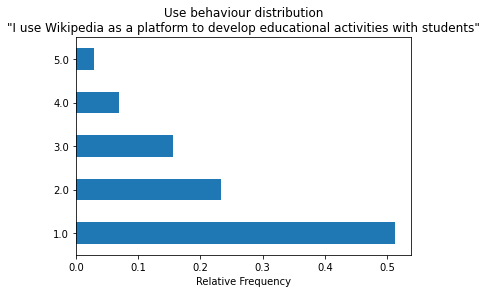

In [12]:
plot_bar('USE2')

### Use behavior 3

Null values:  5

Total number of non-neutral:  542
No     0.638376
Yes    0.361624
Name: USE3, dtype: float64


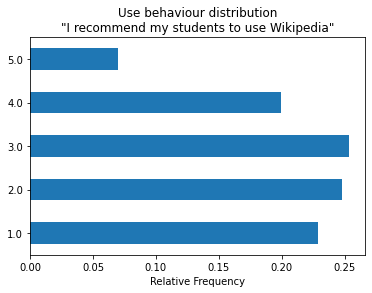

In [13]:
plot_bar('USE3')

### Use behavior 4

Null values:  16

Total number of non-neutral:  528
No     0.683712
Yes    0.316288
Name: USE4, dtype: float64


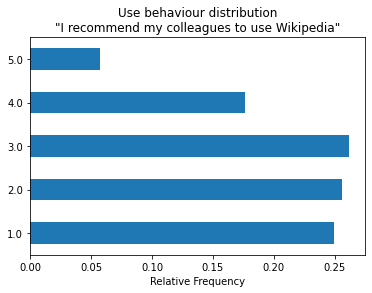

In [14]:
plot_bar('USE4')

### Use behavior 5

Null values:  12

Total number of non-neutral:  494
Yes    0.649798
No     0.350202
Name: USE5, dtype: float64


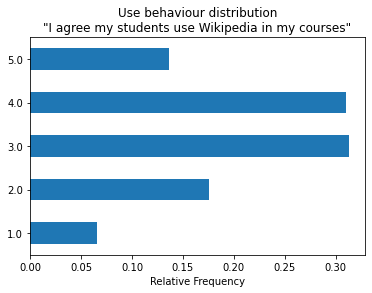

In [15]:
plot_bar('USE5')